In [1]:
import sys
import os
import importlib
from IPython.display import SVG, display

# Ensure src path is available
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

from model.region import RegionModel
from converter.spin import from_region
import svg_viz
importlib.reload(svg_viz)  # Force reload to get latest changes
from svg_viz import spin_to_svg

# Also reload converter
from converter import spin
importlib.reload(spin)

print("Imports successful! (modules reloaded)")


Imports successful! (modules reloaded)


## Single Task
**Expression**: `R1`

2025-12-27 03:01:23 - INFO - Starting conversion from BPMN to Petri net


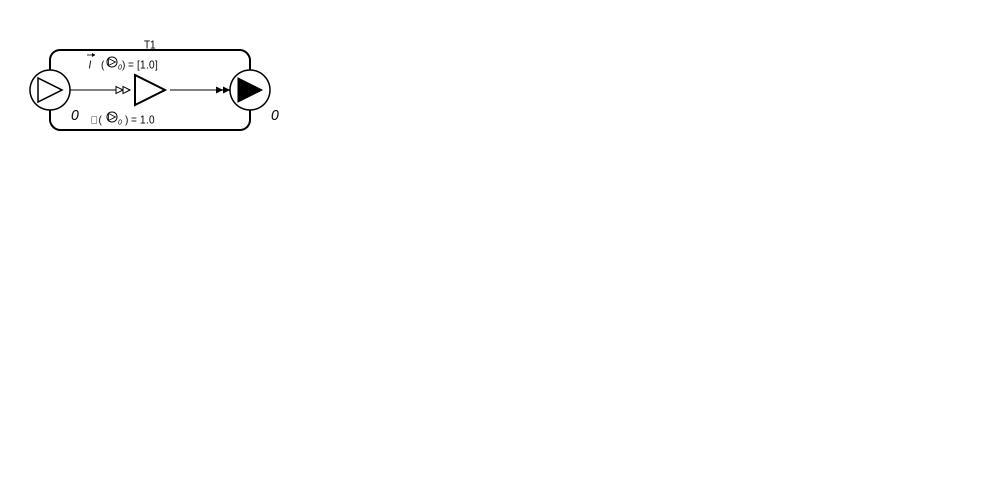

In [2]:
# Expression: R1
region_json = {
    "id": "0",
    "type": "task",
    "label": "T1",
    "duration": 1.0,
    "impacts": [
        1.0
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Sequence Two
**Expression**: `R1, R2`

2025-12-27 03:01:24 - INFO - Starting conversion from BPMN to Petri net


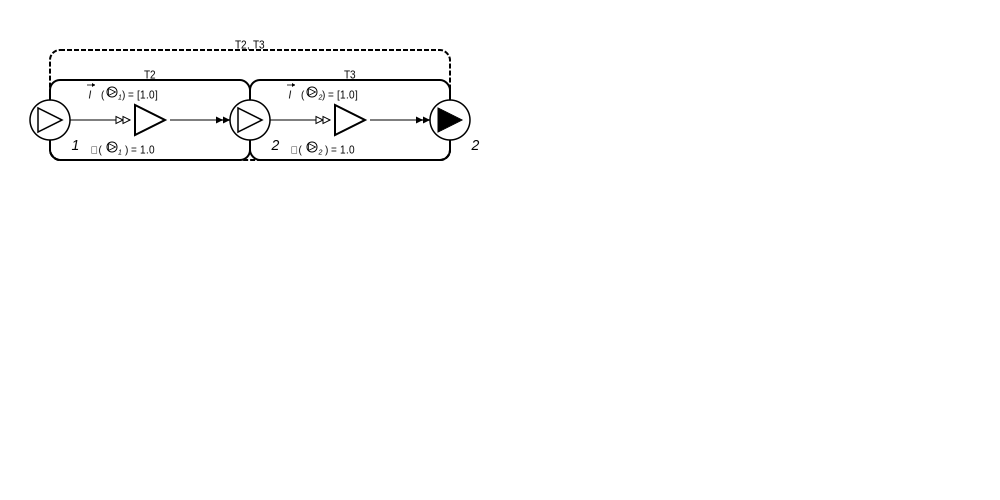

In [3]:
# Expression: R1, R2
region_json = {
    "id": "3",
    "type": "sequential",
    "children": [
        {
            "id": "1",
            "type": "task",
            "label": "T2",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "2",
            "type": "task",
            "label": "T3",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Choice
**Expression**: `R1 /[C1] R2`

2025-12-27 03:01:24 - INFO - Starting conversion from BPMN to Petri net


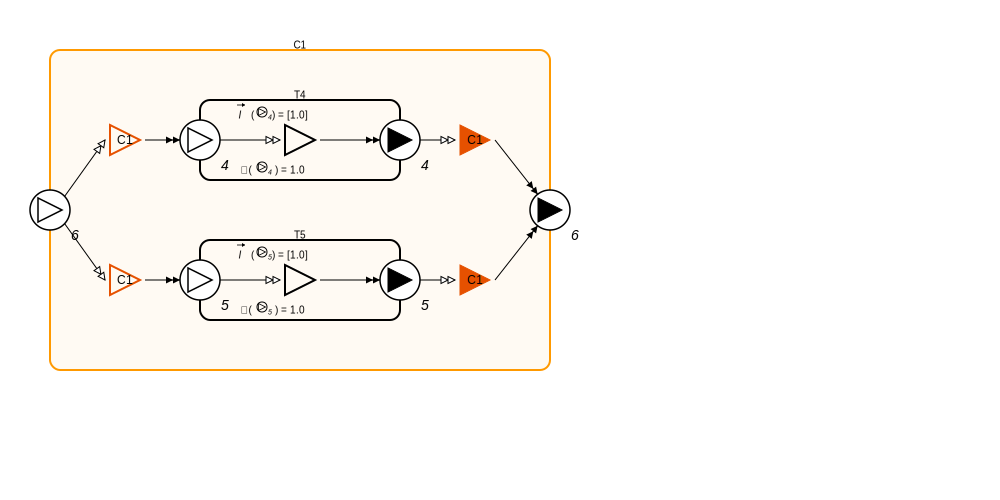

In [4]:
# Expression: R1 /[C1] R2
region_json = {
    "id": "6",
    "type": "choice",
    "label": "C1",
    "children": [
        {
            "id": "4",
            "type": "task",
            "label": "T4",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "5",
            "type": "task",
            "label": "T5",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        }
    ],
    "max_delay": 0.0
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Parallel
**Expression**: `R1 || R2`

2025-12-27 03:01:25 - INFO - Starting conversion from BPMN to Petri net


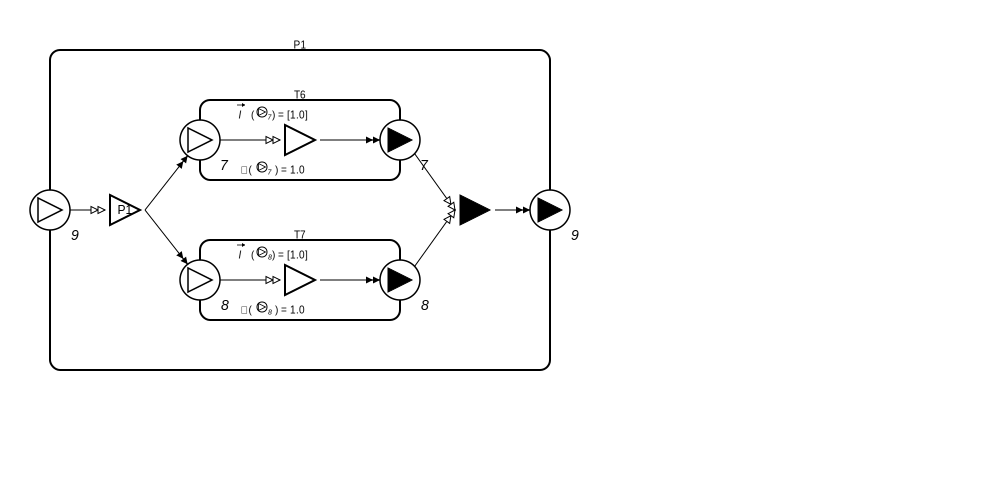

In [5]:
# Expression: R1 || R2
region_json = {
    "id": "9",
    "type": "parallel",
    "label": "P1",
    "children": [
        {
            "id": "7",
            "type": "task",
            "label": "T6",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "8",
            "type": "task",
            "label": "T7",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Loop
**Expression**: `<R1 [L1]>`

2025-12-27 03:01:25 - INFO - Starting conversion from BPMN to Petri net


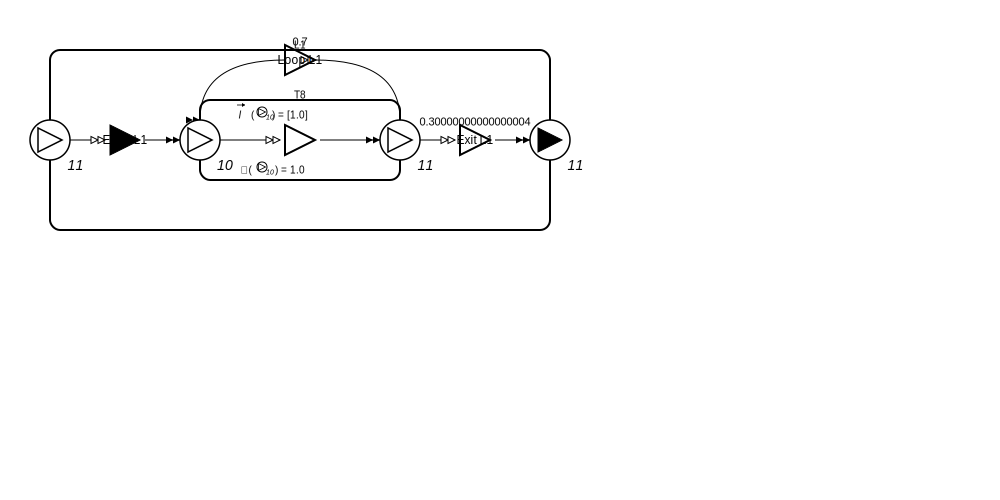

In [6]:
# Expression: <R1 [L1]>
region_json = {
    "id": "11",
    "type": "loop",
    "label": "L1",
    "children": [
        {
            "id": "10",
            "type": "task",
            "label": "T8",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        }
    ],
    "distribution": 0.7,
    "bound": 5
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Nature
**Expression**: `^[N1] (R1, R2)`

2025-12-27 03:01:26 - INFO - Starting conversion from BPMN to Petri net


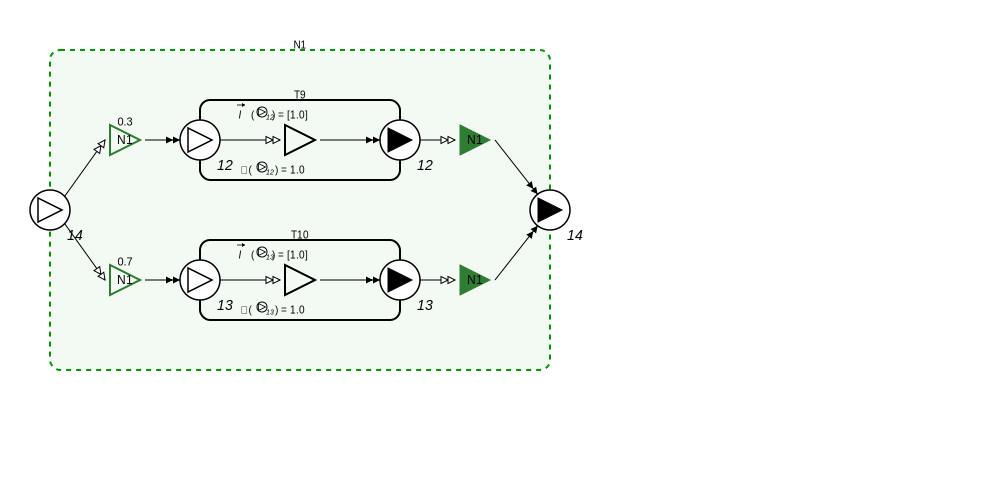

In [7]:
# Expression: ^[N1] (R1, R2)
region_json = {
    "id": "14",
    "type": "nature",
    "label": "N1",
    "children": [
        {
            "id": "12",
            "type": "task",
            "label": "T9",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "13",
            "type": "task",
            "label": "T10",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        }
    ],
    "distribution": [
        0.3,
        0.7
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Sequential + Parallel
**Expression**: `R1, (R2 || R3), R4`

2025-12-27 03:01:28 - INFO - Starting conversion from BPMN to Petri net


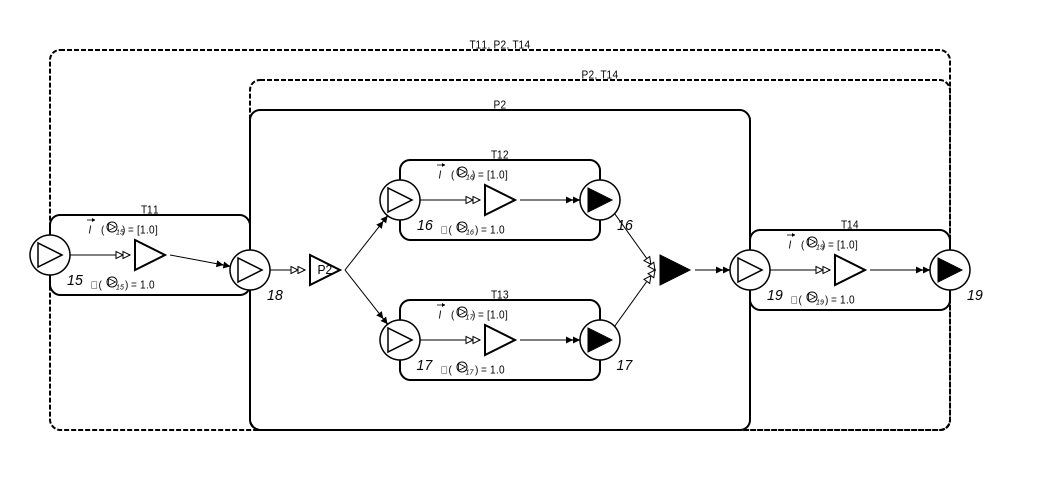

In [8]:
# Expression: R1, (R2 || R3), R4
region_json = {
    "id": "21",
    "type": "sequential",
    "children": [
        {
            "id": "15",
            "type": "task",
            "label": "T11",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "20",
            "type": "sequential",
            "children": [
                {
                    "id": "18",
                    "type": "parallel",
                    "label": "P2",
                    "children": [
                        {
                            "id": "16",
                            "type": "task",
                            "label": "T12",
                            "duration": 1.0,
                            "impacts": [
                                1.0
                            ]
                        },
                        {
                            "id": "17",
                            "type": "task",
                            "label": "T13",
                            "duration": 1.0,
                            "impacts": [
                                1.0
                            ]
                        }
                    ]
                },
                {
                    "id": "19",
                    "type": "task",
                    "label": "T14",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Sequential + Choice
**Expression**: `R1, (R2 /[C1] R3), R4`

2025-12-27 03:01:29 - INFO - Starting conversion from BPMN to Petri net


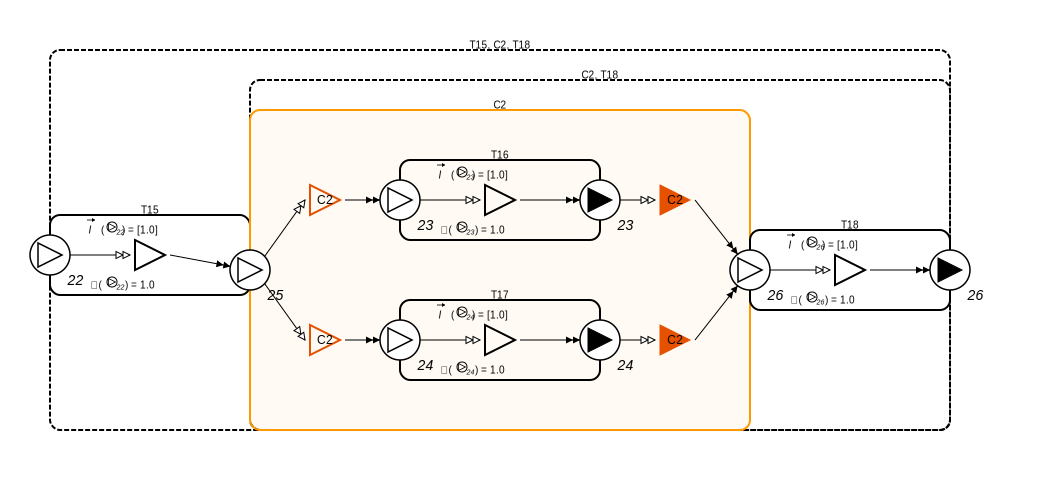

In [9]:
# Expression: R1, (R2 /[C1] R3), R4
region_json = {
    "id": "28",
    "type": "sequential",
    "children": [
        {
            "id": "22",
            "type": "task",
            "label": "T15",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "27",
            "type": "sequential",
            "children": [
                {
                    "id": "25",
                    "type": "choice",
                    "label": "C2",
                    "children": [
                        {
                            "id": "23",
                            "type": "task",
                            "label": "T16",
                            "duration": 1.0,
                            "impacts": [
                                1.0
                            ]
                        },
                        {
                            "id": "24",
                            "type": "task",
                            "label": "T17",
                            "duration": 1.0,
                            "impacts": [
                                1.0
                            ]
                        }
                    ],
                    "max_delay": 0.0
                },
                {
                    "id": "26",
                    "type": "task",
                    "label": "T18",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Sequential + Loop
**Expression**: `R1, <R2 [L1]>, R3`

2025-12-27 03:01:32 - INFO - Starting conversion from BPMN to Petri net


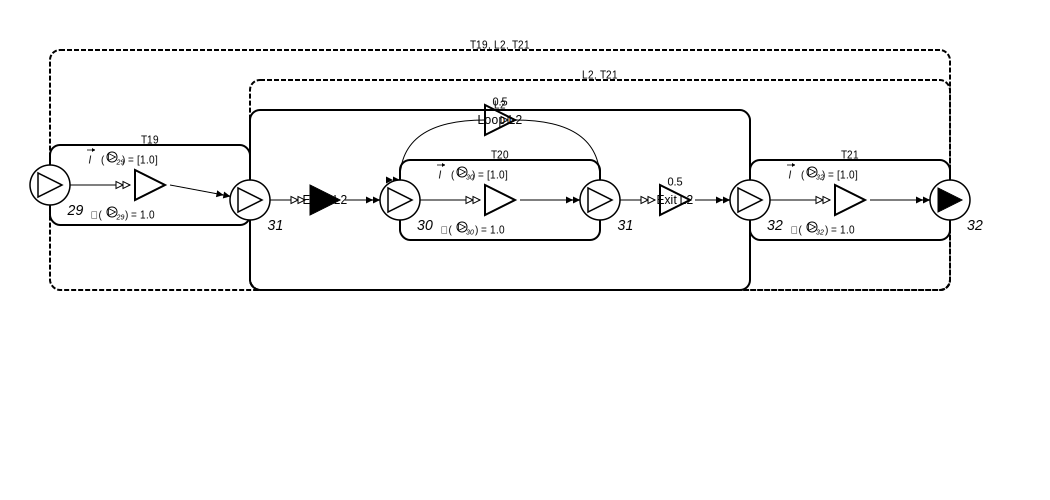

In [10]:
# Expression: R1, <R2 [L1]>, R3
region_json = {
    "id": "34",
    "type": "sequential",
    "children": [
        {
            "id": "29",
            "type": "task",
            "label": "T19",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "33",
            "type": "sequential",
            "children": [
                {
                    "id": "31",
                    "type": "loop",
                    "label": "L2",
                    "children": [
                        {
                            "id": "30",
                            "type": "task",
                            "label": "T20",
                            "duration": 1.0,
                            "impacts": [
                                1.0
                            ]
                        }
                    ],
                    "distribution": 0.5,
                    "bound": 5
                },
                {
                    "id": "32",
                    "type": "task",
                    "label": "T21",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Sequential + Nature
**Expression**: `R1, ^[N1] (R2, R3), R4`

2025-12-27 03:01:36 - INFO - Starting conversion from BPMN to Petri net


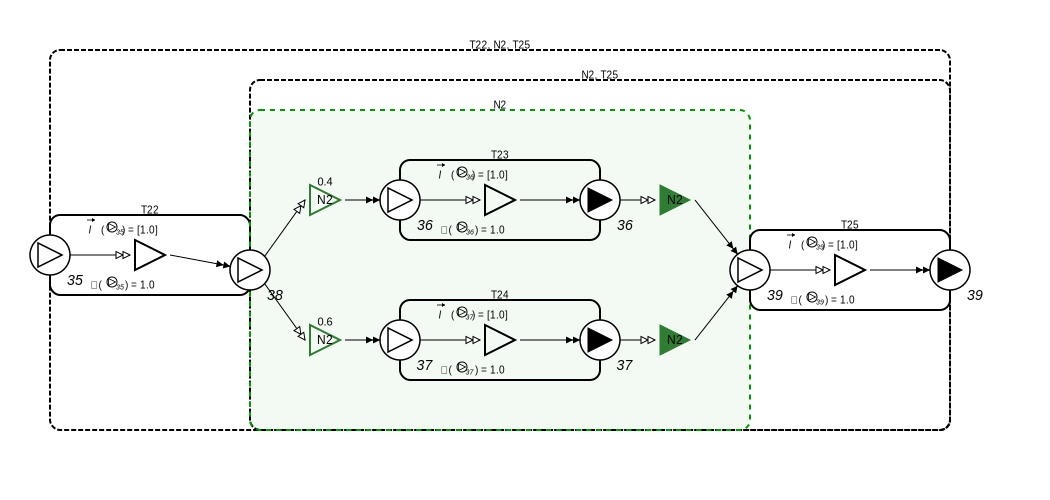

In [11]:
# Expression: R1, ^[N1] (R2, R3), R4
region_json = {
    "id": "41",
    "type": "sequential",
    "children": [
        {
            "id": "35",
            "type": "task",
            "label": "T22",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "40",
            "type": "sequential",
            "children": [
                {
                    "id": "38",
                    "type": "nature",
                    "label": "N2",
                    "children": [
                        {
                            "id": "36",
                            "type": "task",
                            "label": "T23",
                            "duration": 1.0,
                            "impacts": [
                                1.0
                            ]
                        },
                        {
                            "id": "37",
                            "type": "task",
                            "label": "T24",
                            "duration": 1.0,
                            "impacts": [
                                1.0
                            ]
                        }
                    ],
                    "distribution": [
                        0.4,
                        0.6
                    ]
                },
                {
                    "id": "39",
                    "type": "task",
                    "label": "T25",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Complex Parallel
**Expression**: `R1, ((R2 /[C1] R3) || <R4 [L1]>), R5`

2025-12-27 03:01:38 - INFO - Starting conversion from BPMN to Petri net


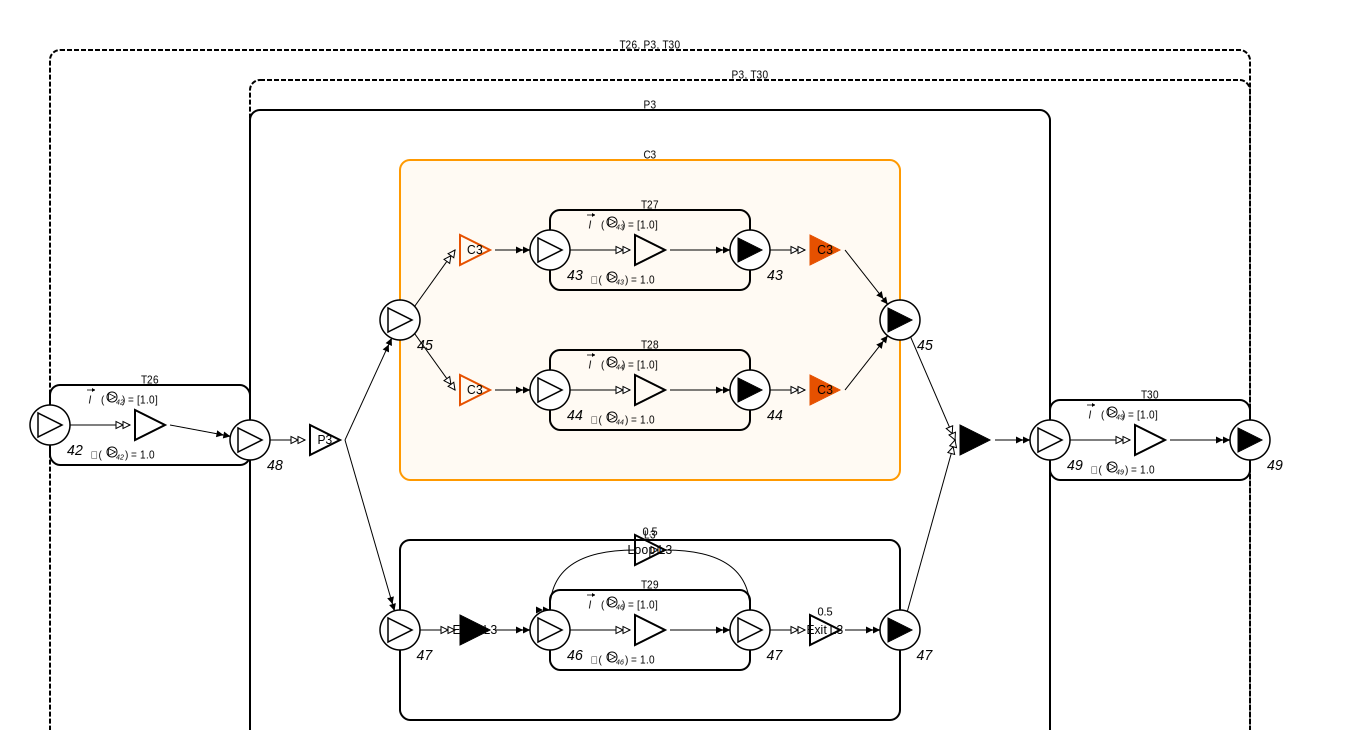

In [12]:
# Expression: R1, ((R2 /[C1] R3) || <R4 [L1]>), R5
region_json = {
    "id": "51",
    "type": "sequential",
    "children": [
        {
            "id": "42",
            "type": "task",
            "label": "T26",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "50",
            "type": "sequential",
            "children": [
                {
                    "id": "48",
                    "type": "parallel",
                    "label": "P3",
                    "children": [
                        {
                            "id": "45",
                            "type": "choice",
                            "label": "C3",
                            "children": [
                                {
                                    "id": "43",
                                    "type": "task",
                                    "label": "T27",
                                    "duration": 1.0,
                                    "impacts": [
                                        1.0
                                    ]
                                },
                                {
                                    "id": "44",
                                    "type": "task",
                                    "label": "T28",
                                    "duration": 1.0,
                                    "impacts": [
                                        1.0
                                    ]
                                }
                            ],
                            "max_delay": 0.0
                        },
                        {
                            "id": "47",
                            "type": "loop",
                            "label": "L3",
                            "children": [
                                {
                                    "id": "46",
                                    "type": "task",
                                    "label": "T29",
                                    "duration": 1.0,
                                    "impacts": [
                                        1.0
                                    ]
                                }
                            ],
                            "distribution": 0.5,
                            "bound": 5
                        }
                    ]
                },
                {
                    "id": "49",
                    "type": "task",
                    "label": "T30",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Parallel Choice Simple
**Expression**: `((R2 /[C1] R3) || R4)`

2025-12-27 03:01:41 - INFO - Starting conversion from BPMN to Petri net


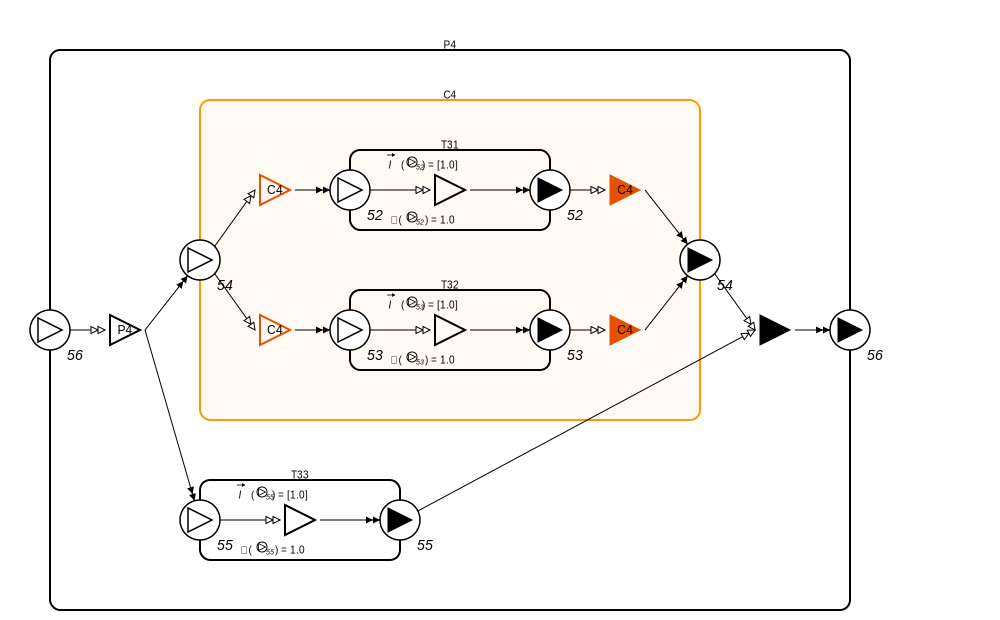

In [13]:
# Expression: ((R2 /[C1] R3) || R4)
region_json = {
    "id": "56",
    "type": "parallel",
    "label": "P4",
    "children": [
        {
            "id": "54",
            "type": "choice",
            "label": "C4",
            "children": [
                {
                    "id": "52",
                    "type": "task",
                    "label": "T31",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                },
                {
                    "id": "53",
                    "type": "task",
                    "label": "T32",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ],
            "max_delay": 0.0
        },
        {
            "id": "55",
            "type": "task",
            "label": "T33",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Choice of Parallels
**Expression**: `(R1 || R2) /[C1] (R3 || R4)`

2025-12-27 03:01:45 - INFO - Starting conversion from BPMN to Petri net


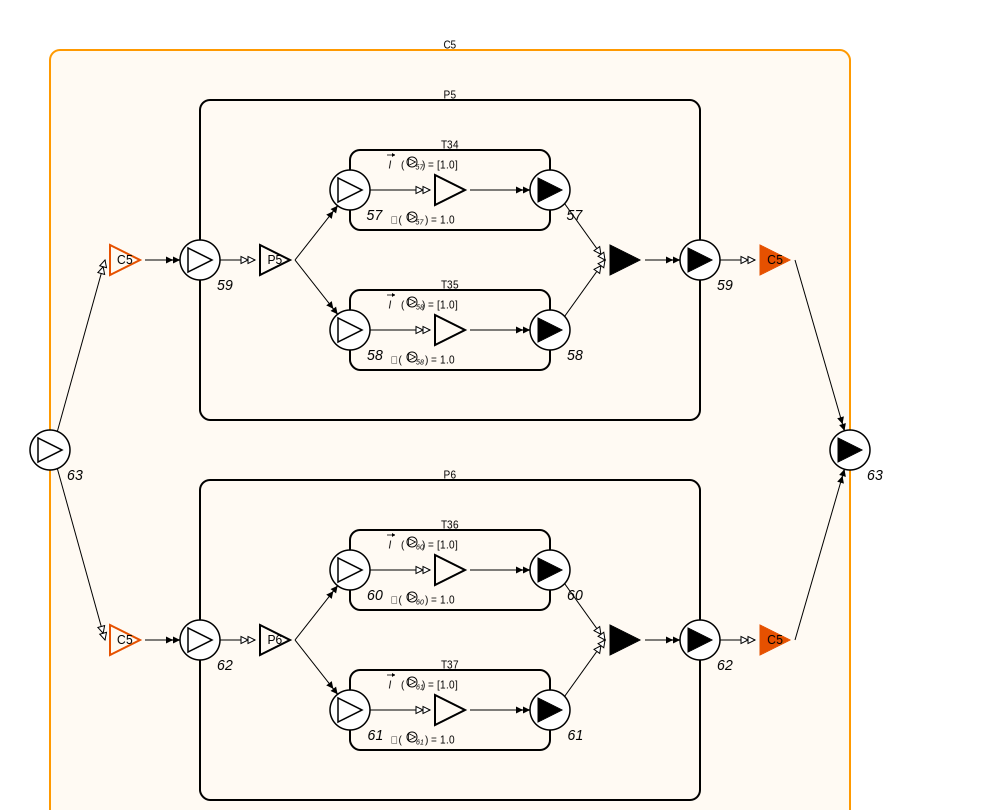

In [14]:
# Expression: (R1 || R2) /[C1] (R3 || R4)
region_json = {
    "id": "63",
    "type": "choice",
    "label": "C5",
    "children": [
        {
            "id": "59",
            "type": "parallel",
            "label": "P5",
            "children": [
                {
                    "id": "57",
                    "type": "task",
                    "label": "T34",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                },
                {
                    "id": "58",
                    "type": "task",
                    "label": "T35",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        },
        {
            "id": "62",
            "type": "parallel",
            "label": "P6",
            "children": [
                {
                    "id": "60",
                    "type": "task",
                    "label": "T36",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                },
                {
                    "id": "61",
                    "type": "task",
                    "label": "T37",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        }
    ],
    "max_delay": 0.0
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Parallel with Loop
**Expression**: `R1 || <R2 [L1]>`

2025-12-27 03:01:46 - INFO - Starting conversion from BPMN to Petri net


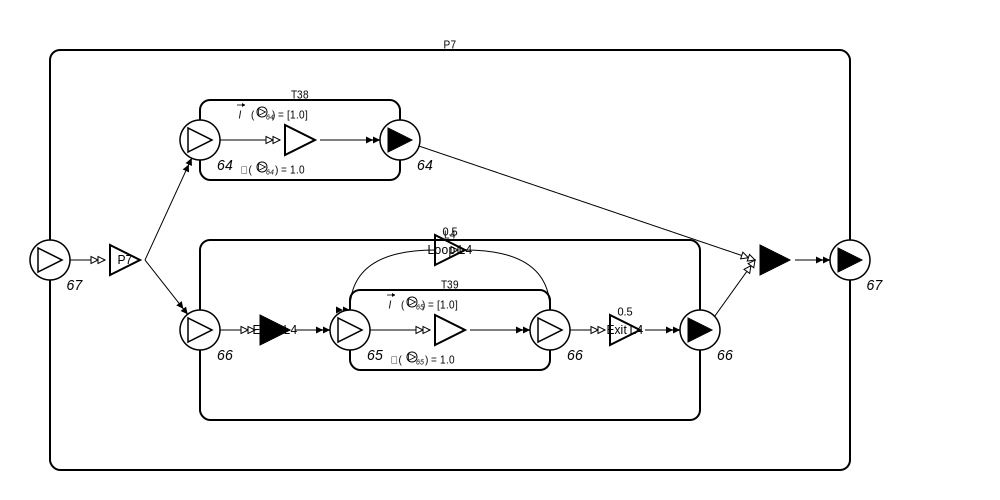

In [15]:
# Expression: R1 || <R2 [L1]>
region_json = {
    "id": "67",
    "type": "parallel",
    "label": "P7",
    "children": [
        {
            "id": "64",
            "type": "task",
            "label": "T38",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        },
        {
            "id": "66",
            "type": "loop",
            "label": "L4",
            "children": [
                {
                    "id": "65",
                    "type": "task",
                    "label": "T39",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ],
            "distribution": 0.5,
            "bound": 5
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Sequential in Parallel
**Expression**: `(R1, R2) || (R3, R4)`

2025-12-27 03:01:47 - INFO - Starting conversion from BPMN to Petri net


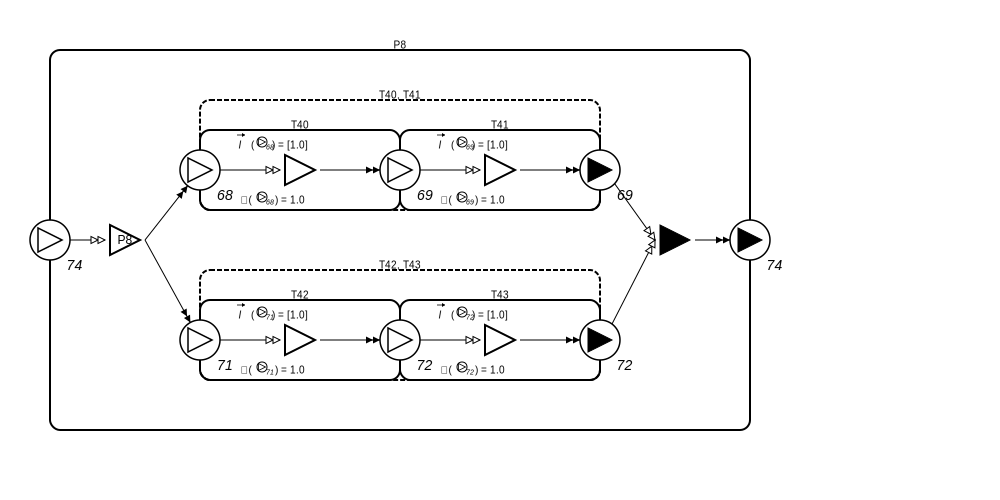

In [16]:
# Expression: (R1, R2) || (R3, R4)
region_json = {
    "id": "74",
    "type": "parallel",
    "label": "P8",
    "children": [
        {
            "id": "70",
            "type": "sequential",
            "children": [
                {
                    "id": "68",
                    "type": "task",
                    "label": "T40",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                },
                {
                    "id": "69",
                    "type": "task",
                    "label": "T41",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        },
        {
            "id": "73",
            "type": "sequential",
            "children": [
                {
                    "id": "71",
                    "type": "task",
                    "label": "T42",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                },
                {
                    "id": "72",
                    "type": "task",
                    "label": "T43",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ]
        }
    ]
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))


## Nested Choice
**Expression**: `(R1 /[C1] R2) /[C2] R3`

2025-12-27 03:01:49 - INFO - Starting conversion from BPMN to Petri net


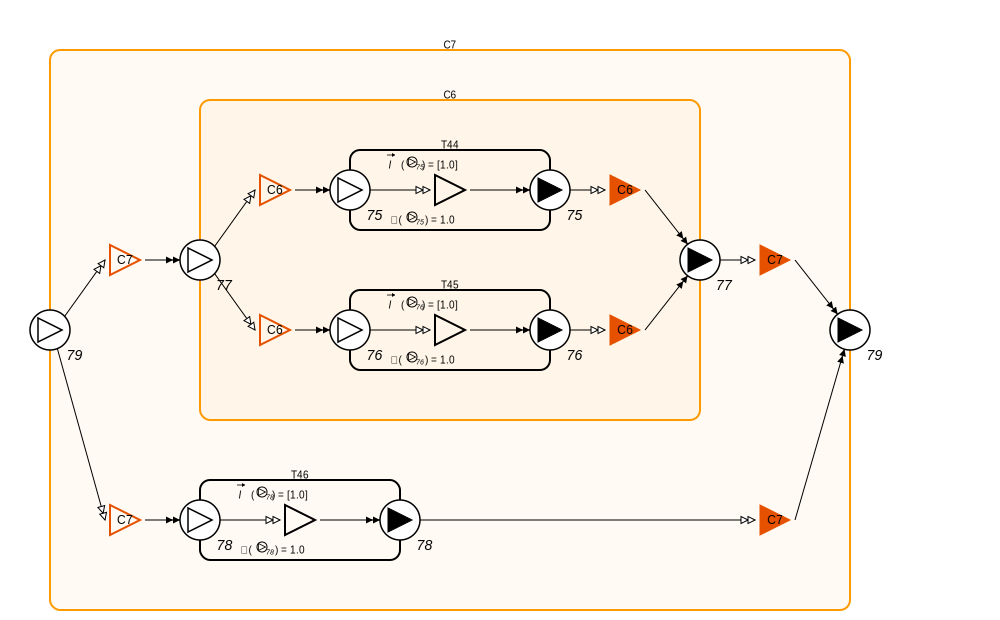

In [17]:
# Expression: (R1 /[C1] R2) /[C2] R3
region_json = {
    "id": "79",
    "type": "choice",
    "label": "C7",
    "children": [
        {
            "id": "77",
            "type": "choice",
            "label": "C6",
            "children": [
                {
                    "id": "75",
                    "type": "task",
                    "label": "T44",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                },
                {
                    "id": "76",
                    "type": "task",
                    "label": "T45",
                    "duration": 1.0,
                    "impacts": [
                        1.0
                    ]
                }
            ],
            "max_delay": 0.0
        },
        {
            "id": "78",
            "type": "task",
            "label": "T46",
            "duration": 1.0,
            "impacts": [
                1.0
            ]
        }
    ],
    "max_delay": 0.0
}

# 1. Parse JSON to RegionModel (Pydantic handles Enum conversion)
region_model = RegionModel.model_validate(region_json)

# 2. Convert to Petri Net
net, im, fm = from_region(region_model)

# 3. Generate SVG
svg_out = spin_to_svg(net, width=1000, height=500, region=region_model)
display(SVG(svg_out))
